## Technical Exercise for Data Scientist Candidates

For this exercise, you will be working with beer data which can be downloaded from here 
https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq
 
Unzip the file and you should see a CSV file, called “BeerDataScienceProject.csv”

The columns are
beer_ABV	beer_beerId	beer_brewerId	beer_name	beer_style	review_appearance	review_palette	review_overall	review_taste	review_profileName	review_aroma	review_text	review_time


You may use any one or more among the following open source programming language(s) (Python, R, C++, Java, Scala, Julia, etc.) if you like to do so (no “SQL” Based Code). You are welcome to use any other open source framework, packages, and technologies. Please provide your answers below the questions. 

When you submit your answers, please provide a link to your code in public repository like github with instructions on how to run it to reproduce your results.

Include few slides to summarize your findings and to convince the audience.     

Answer as many questions as possible.
 
Questions: 

1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?
7.	How do find similar beer drinkers by using written reviews only?   

*Please include all plots you created to complete the project and to explain your results. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('BeerDataScienceProject.csv',encoding='latin-1')
# fetch year from time column
df['review_year'] = pd.DatetimeIndex(pd.to_datetime(df['review_time'], unit='s')).year
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


In [3]:
df['review_year'].unique()

array([2009, 2010, 2012, 2011, 2004, 2003, 2008, 2007, 2006, 2005, 2002,
       2001, 2000, 1999, 1998])

In [4]:
df.shape

(528870, 14)

In [5]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
review_year             int64
dtype: object

In [6]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05,528870.000000
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09,2008.307208
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07,2.409739
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08,1998.000000
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09,2007.000000
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09,2009.000000
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09,2010.000000
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09,2012.000000


### Drop Null Values

In [7]:
#count null values
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
review_year               0
dtype: int64

In [8]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", round(df.isna().sum().max() / len(df) * 100, 2),"%")

Percent Null Values of `beer_abv` column: 3.83 %


In [9]:
# Drop Null Values
print("Removing all null values only impacts the size of the dataset by a little over", round(df.isna().sum().max() / len(df) * 100, 2) , "%")
df = df.dropna()
df.isna().sum()

Removing all null values only impacts the size of the dataset by a little over 3.83 %


beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
review_year           0
dtype: int64

### Drop Duplicate Values
If a user has rated the same beer more than once, then only keep their highest rating.

In [10]:
count_before_duplicate_removal = len(df.index)
# Sort by user overall rating first
df = df.sort_values('review_overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
df = df.drop_duplicates(subset=['review_profileName', 'beer_name'], keep='first')
count_after_duplicate_removal = len(df.index)

# Percent of data that are duplicates
print("Percent of Duplicate Values (Removing all duplicate values drops about", round((count_before_duplicate_removal - count_after_duplicate_removal)/ count_before_duplicate_removal * 100, 2),"% of the remaining data):")


Percent of Duplicate Values (Removing all duplicate values drops about 1.1 % of the remaining data):


### Remove <1 and >5 Ratings 
Ratings are on scale of 1-5 so remove ratings < 1 or > 5

In [11]:
df = df[( (df['review_overall'] >= 1) | (df['review_overall'] <=5) ) | ( (df['review_appearance'] >= 1) | (df['review_appearance'] <= 5) )]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502769 non-null  float64
 1   beer_beerId         502769 non-null  int64  
 2   beer_brewerId       502769 non-null  int64  
 3   beer_name           502769 non-null  object 
 4   beer_style          502769 non-null  object 
 5   review_appearance   502769 non-null  float64
 6   review_palette      502769 non-null  float64
 7   review_overall      502769 non-null  float64
 8   review_taste        502769 non-null  float64
 9   review_profileName  502769 non-null  object 
 10  review_aroma        502769 non-null  float64
 11  review_text         502769 non-null  object 
 12  review_time         502769 non-null  int64  
 13  review_year         502769 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.5+ MB


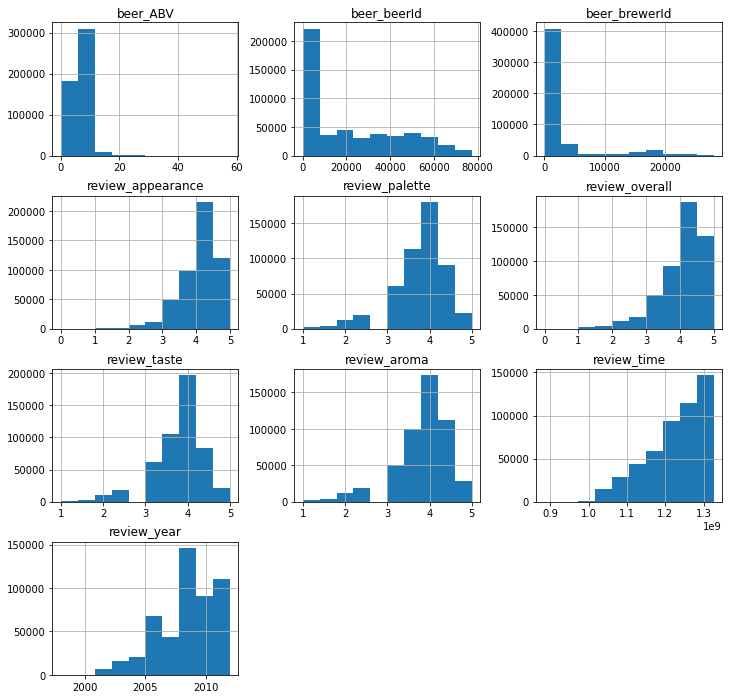

In [12]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,12))
plt.show()

In [13]:
df.corr()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,review_year
beer_ABV,1.000000,0.217320,0.078702,0.251827,0.318706,0.118760,0.268288,0.270915,0.142641,0.144276
beer_beerId,0.217320,1.000000,0.460914,0.050835,0.060654,-0.012547,0.035680,0.014374,0.460211,0.456756
beer_brewerId,0.078702,0.460914,1.000000,-0.004555,0.017241,-0.014356,-0.002606,-0.009661,0.246254,0.242698
review_appearance,0.251827,0.050835,-0.004555,1.000000,0.544325,0.482822,0.551516,0.530783,0.046353,0.047444
review_palette,0.318706,0.060654,0.017241,0.544325,1.000000,0.597741,0.600336,0.702967,0.049932,0.050229
review_overall,0.118760,-0.012547,-0.014356,0.482822,0.597741,1.000000,0.688935,0.780247,0.018225,0.019497
review_taste,0.268288,0.035680,-0.002606,0.551516,0.600336,0.688935,1.000000,0.722357,0.043758,0.044976
review_aroma,0.270915,0.014374,-0.009661,0.530783,0.702967,0.780247,0.722357,1.000000,0.028925,0.029950
review_time,0.142641,0.460211,0.246254,0.046353,0.049932,0.018225,0.043758,0.028925,1.000000,0.992318
review_year,0.144276,0.456756,0.242698,0.047444,0.050229,0.019497,0.044976,0.029950,0.992318,1.000000


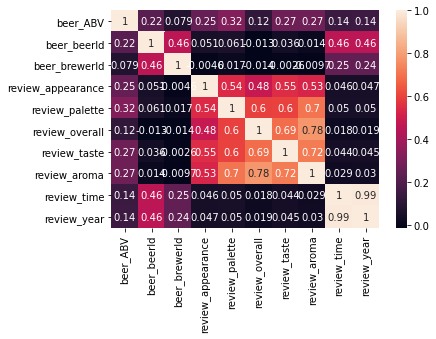

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

## Question:1 
Rank top 3 Breweries which produce the strongest beers?

In [15]:
data = df.groupby(['beer_brewerId'])['beer_ABV'].mean()
strong = pd.DataFrame(data.reset_index())

strong.columns = ['beer_brewerId','beer_abv_mean']

strongest = strong.sort_values(by=['beer_abv_mean'], ascending=False).head(3)

strongest

,beer_brewerId,beer_abv_mean
698,6513,19.228824
165,736,13.750000
1464,24215,12.466667


## Question:2 
Which year did beers enjoy the highest ratings?

In [16]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352,2005


In [17]:
reviews = df.groupby('beer_beerId').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
top_reviews = pd.DataFrame(reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
highest_review = pd.merge(df[['review_year','beer_beerId']],top_reviews[:1],on='beer_beerId') 
highest_review

,review_year,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV
0,2002,1734,5.0,5.0,5.0,5.0,5.0,10.0


In [18]:
print("Year : ",highest_review['review_year'].to_string(index=False))

Year :   2002


## Question:3 
Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [19]:
factors = df[['review_overall','review_aroma','review_taste','review_appearance','review_palette']]
factors.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palette
492945,5.0,5.0,4.5,4.5,3.0
172728,5.0,4.0,4.5,5.0,3.0
409699,5.0,4.5,4.5,4.0,4.0
517331,5.0,4.5,4.5,4.5,4.5
172704,5.0,5.0,4.0,3.0,3.5


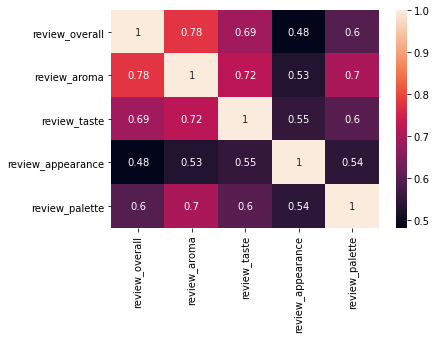

In [20]:
sns.heatmap(factors.corr(), annot=True)
plt.show()

In [21]:
features = factors.drop(["review_overall"], axis=1).columns
features

Index(['review_aroma', 'review_taste', 'review_appearance', 'review_palette'], dtype='object')

In [22]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(factors[features].values, factors["review_overall"].values)
feature_importance = rnd_clf.feature_importances_

In [23]:
for name, score in zip(features, feature_importance):
    print(name, score)

review_aroma 0.9248645379952832
review_taste 0.05626699791221676
review_appearance 0.010016248131058496
review_palette 0.008852215961441503


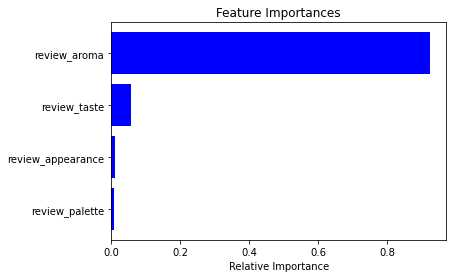

In [24]:
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## Question:4 
If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502769 non-null  float64
 1   beer_beerId         502769 non-null  int64  
 2   beer_brewerId       502769 non-null  int64  
 3   beer_name           502769 non-null  object 
 4   beer_style          502769 non-null  object 
 5   review_appearance   502769 non-null  float64
 6   review_palette      502769 non-null  float64
 7   review_overall      502769 non-null  float64
 8   review_taste        502769 non-null  float64
 9   review_profileName  502769 non-null  object 
 10  review_aroma        502769 non-null  float64
 11  review_text         502769 non-null  object 
 12  review_time         502769 non-null  int64  
 13  review_year         502769 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 57.5+ MB


In [26]:
"""
I will pick the 3 beers based on the mean of the
1) review_overall, 
2) review_aroma, 
3) review_appearance 
4) review_palate, 
5) review_taste
6) beer_ABV
"""
reviews = df.groupby('beer_beerId').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
recommended_beers = pd.DataFrame(reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
top_rated_beers = pd.merge(recommended_beers[:3],df[['beer_beerId','beer_name','beer_style']],on='beer_beerId') 
top_rated_beers

,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV,beer_name,beer_style
0,1734,5.0,5.0,5.0,5.0,5.0,10.0,Edsten Triple-Wit,Belgian Strong Pale Ale
1,29423,5.0,5.0,5.0,5.0,5.0,9.5,Old Gander Barley Wine,American Barleywine
2,45944,5.0,5.0,5.0,5.0,5.0,9.0,Rogue Black Brutal,Schwarzbier


## Question:5 
Which Beer style seems to be the favorite based on reviews written by users?

In [27]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352,2005


In [31]:
#!pip install -U spacy

     |████████████████████████████████| 10.2 MB 501 kB/s eta 0:00:01
     |████████████████████████████████| 287 kB 457 kB/s eta 0:00:01
     |████████████████████████████████| 263 kB 329 kB/s eta 0:00:01
     |████████████████████████████████| 981 kB 403 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 609 kB/s eta 0:00:01


In [35]:
#!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 612 kB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047106 sha256=6901a093ac9ec0986a3852f1536e6d42cb15264caa70bd278976ba407de99756
  Stored in directory: /private/var/folders/p9/8ffklx691fs3y8mzc6pmwrjc0000gq/T/pip-ephem-wheel-cache-5my3t9_z/wheels/ee/4d/f7/563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [28]:
# Pre-Processing and cleaning the "review_text" column
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()
import re

#convert to lowercase
df['review_text'] = df['review_text'].apply(lambda x: x.lower()) 

# Contraction to Expansion
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    
df['review_text'] = df['review_text'].apply(lambda x: cont_to_exp(x))    

#Special Chars removal or punctuation removal
df['review_text'] = df['review_text'].apply(lambda x: re.sub('[^a-z ]+', '', x))

#Remove multiple spaces
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x.split()))

#Remove Stop Words
df['review_text'] = df['review_text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [29]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,served c gorgeous pour nut brown slightly redd...,1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,beer tops crisp smooth taste leaves mouths wan...,1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,thanks mikereaser sending trade oz bottle hand...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,beer try drinkable smooth beer higher rating e...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,met like beeruntil read reviews little thin bi...,1135296352,2005


In [30]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
df['polarity_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [32]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,polarity_score
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,served c gorgeous pour nut brown slightly redd...,1221003321,2008,0.8910
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,beer tops crisp smooth taste leaves mouths wan...,1129192511,2005,0.9442
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,thanks mikereaser sending trade oz bottle hand...,1235006981,2009,0.9909
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,beer try drinkable smooth beer higher rating e...,1203476701,2008,0.7506
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,met like beeruntil read reviews little thin bi...,1135296352,2005,0.9392


In [33]:
# Group by 'beer_style' and calculate mean of polarity score
df.groupby('beer_style')['polarity_score'].mean().sort_values(ascending=False)[0:10]

beer_style
Eisbock                             0.895533
Braggot                             0.888665
Quadrupel (Quad)                    0.886003
Flanders Red Ale                    0.884181
Wheatwine                           0.877290
Dortmunder / Export Lager           0.874505
American Double / Imperial Stout    0.872497
Roggenbier                          0.867612
American Wild Ale                   0.867445
Old Ale                             0.863763
Name: polarity_score, dtype: float64

#### mean compund ploarity score tells us the beer style "Eisbock" is quite most favorite

## Question:6 
How does written review compare to overall review score for the beer styles?

In [37]:
reviews_all = df.groupby('beer_style').agg({
                                            'polarity_score': np.mean,
                                            'review_overall': np.mean
                                        })
review_score_beerstyle = pd.DataFrame(reviews_all.reset_index()).sort_values(['polarity_score','review_overall'], ascending=[False,False])
review_score_beerstyle.head()

,beer_style,polarity_score,review_overall
41,Eisbock,0.895533,4.082902
32,Braggot,0.888665,3.647208
86,Quadrupel (Quad),0.886003,4.053349
58,Flanders Red Ale,0.884181,3.968012
101,Wheatwine,0.877290,3.817614


#### we can see above how the user written review text is collaborating in calculating the overall review score.

## Question:7 
How do find similar beer drinkers by using written reviews only?

In [192]:
#!pip install gensim

     |████████████████████████████████| 24.2 MB 642 kB/s eta 0:00:01
     |████████████████████████████████| 117 kB 1.6 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108247 sha256=d21b26a0f4275a50297f5fcaa57820787f14fae6f869efe1181dde49d9170e32
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/8c/f9/f4/4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open


In [38]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,polarity_score
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,served c gorgeous pour nut brown slightly redd...,1221003321,2008,0.8910
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,beer tops crisp smooth taste leaves mouths wan...,1129192511,2005,0.9442
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,thanks mikereaser sending trade oz bottle hand...,1235006981,2009,0.9909
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,beer try drinkable smooth beer higher rating e...,1203476701,2008,0.7506
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,met like beeruntil read reviews little thin bi...,1135296352,2005,0.9392


In [39]:
#splitting the review_text into words

corpus = []
for words in df['review_text']:
    corpus.append(words.split())

In [ ]:
# training word2vec model
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
mymodel_cbow = Word2Vec(corpus, min_count=1, size = 300)        

In [56]:
# summarizing the loaded model
print(mymodel_cbow)  

Word2Vec(vocab=282290, size=300, alpha=0.025)


In [42]:
# summarize vocabulary
words = list(mymodel_cbow.wv.vocab)

In [44]:
# access word vector for one word "training"
print(mymodel_cbow['beer'])

[ 2.2327862e+00  1.2265428e+00 -1.6574638e-01  2.7329817e-01
  1.7350049e+00 -1.7700343e-01  8.9675611e-01 -1.8949492e+00
  4.0200230e-01  1.6994317e-01  5.4109579e-01 -1.0732179e+00
  2.2130029e-01  1.1886581e+00 -7.6537395e-01  7.3954701e-01
 -1.4563918e+00  7.4915642e-01 -3.7363827e-02 -7.7630174e-01
 -8.9502090e-01 -1.0217751e+00 -8.1320119e-01 -5.3126192e-01
 -1.6761960e-01  4.5345452e-01  8.2389379e-01  4.2080531e-01
 -8.7452531e-01 -1.1062791e+00  3.7828043e-01  9.9431884e-01
  4.4397539e-01  4.5040822e-01 -6.5581739e-01 -2.6687676e-01
 -5.0386846e-01  7.5542408e-01  9.0277386e-01  2.5702890e-02
 -8.4034228e-01  1.3197689e+00  1.3756870e+00  3.1048310e-01
  5.8427709e-01  1.8463068e-01  2.3107590e-01 -8.6612153e-01
  1.2055897e+00 -3.2623020e-01 -2.1121659e+00  3.1906238e-01
  1.3530995e+00  6.1933154e-01  9.3247056e-01  1.8564705e+00
 -2.5137889e-01  1.3834295e+00 -6.5013826e-01  9.9796402e-01
 -1.1050708e+00 -8.3355504e-01  1.6151541e+00 -6.2301540e-01
  1.6437958e-01 -5.72620

In [45]:
mymodel_cbow.most_similar("prosper")

[('likevelvety', 0.7974509000778198),
 ('kiteflying', 0.7935069799423218),
 ('mouthfeelchampagne', 0.7913309335708618),
 ('streekbierbire', 0.7858453989028931),
 ('refreshingwellbalancedand', 0.7851138710975647),
 ('etou', 0.7829715013504028),
 ('basketyard', 0.7822415232658386),
 ('immortalized', 0.7820353507995605),
 ('petticoats', 0.7820003032684326),
 ('perceptveis', 0.7814833521842957)]

In [49]:
# Generate the average word2vec for the each review_text

def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each review_texts
    for line in df['review_text']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in mymodel_cbow.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = mymodel_cbow[word]
                else:
                    avgword2vec = avgword2vec + mymodel_cbow[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

In [60]:
# Recommending the Top 5 similar drinkers

def recommendations(title):
    
    # Calling the function vectors

    vectors(df)
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

    drinker = df[['review_profileName']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['review_profileName']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    drinker_indices = [i[0] for i in sim_scores]
    recommend = drinker.iloc[drinker_indices]
    for index, row in recommend.iterrows():
        print(row['review_profileName'])

In [ ]:
recommendations("abents") #this will print similar drinkers based on similarity score